In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis = 1, inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal_width')

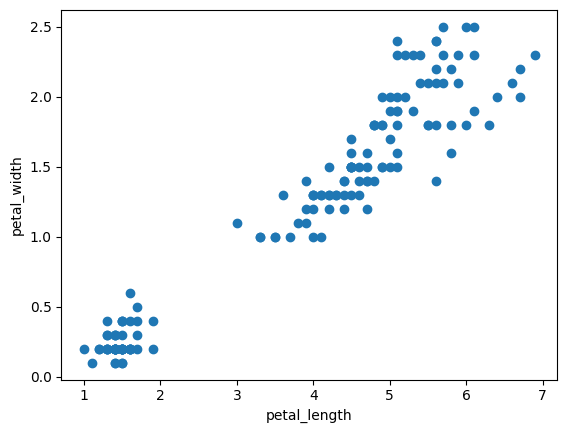

In [6]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [7]:
km = KMeans(n_clusters = 3)
yp = km.fit_predict(df)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df['cluster'] = yp
df.cluster.unique()

array([1, 0, 2])

Text(0, 0.5, 'petal_width')

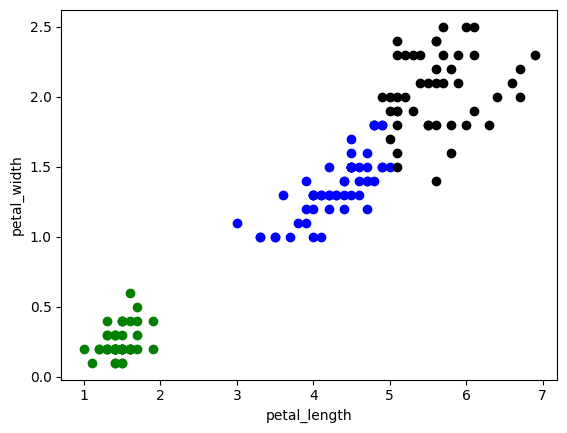

In [9]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'black')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [10]:
km.cluster_centers_

array([[4.29259259, 1.35925926],
       [1.462     , 0.246     ],
       [5.62608696, 2.04782609]])

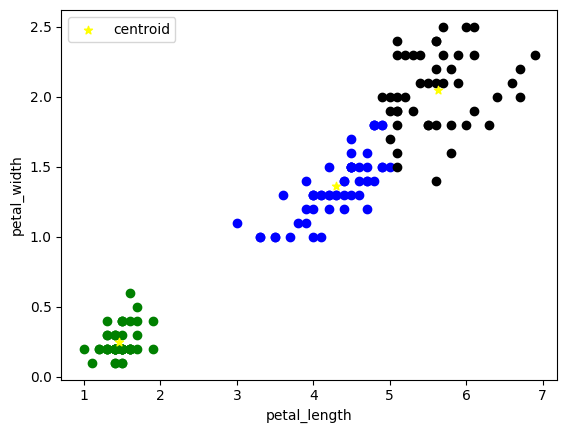

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'yellow', marker = '*', label = 'centroid')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

In [12]:
sse = []
k_rng = range(1, 11)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)

In [13]:
sse

[650.4686666666665,
 185.8756625074272,
 31.412885668276978,
 23.52765502645503,
 14.312483391608392,
 11.943021071521075,
 11.043147144522145,
 8.330929903429904,
 8.202493038150934,
 6.96161385836386]

Text(0, 0.5, 'SSE')

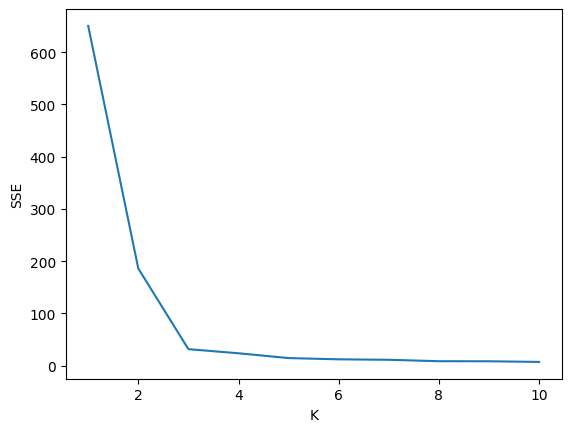

In [14]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('SSE')